<a href="https://colab.research.google.com/github/dajebbar/Deep-Learning-with-PyTorch-Zero-to-GANs/blob/main/cnn_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('cnn-in-pytorch')
jovian.set_colab_id('1BXaSCxGS7dk52hBbWfYi5WrlEj4BivsP')

     |████████████████████████████████| 71kB 3.1MB/s 


# cnn-in-pytorch

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="cnn-in-pytorch")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/boubekri/cnn-in-pytorch


'https://jovian.ai/boubekri/cnn-in-pytorch'

In [5]:
import os
import torch
import torchvision
import tarfile

from torch.utils.data import random_split
from torchvision.datasets.utils import download_url

# downloading dataset

In [6]:
url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(url, '.')

# Extract from archive

In [7]:
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

The dataset is extracted to the directory `data/cifar10`. It contains 2 folders `train` and `test`, containing the training set (50000 images) and test set (10000 images) respectively. Each of them contains 10 folders, one for each class of images. Let's verify this using `os.listdir`.



In [8]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))

classes = os.listdir(data_dir + '/train')
print(classes)

['test', 'train']
['automobile', 'ship', 'horse', 'dog', 'deer', 'cat', 'bird', 'frog', 'truck', 'airplane']


Let's look inside a couple of folders, one from the training set and another from the test set.

In [9]:
bird_dir = os.listdir(data_dir + '/train/bird')
print('No. of training exples for birds:', len(bird_dir))
print(bird_dir[:5])

No. of training exples for birds: 5000
['2639.png', '4136.png', '2521.png', '2262.png', '2055.png']


In [11]:
dog_dir = os.listdir(data_dir + '/test/dog')
print('No. of training exples for dogs:', len(dog_dir))
print(dog_dir[:5])

No. of training exples for dogs: 1000
['0153.png', '0596.png', '0002.png', '0376.png', '0022.png']


The above directory structure (one folder per class) is used by many computer vision datasets, and most deep learning libraries provide utilites for working with such datasets. We can use the `ImageFolder` class from `torchvision` to load the data as PyTorch tensors.



In [12]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [14]:
dataset = ImageFolder(data_dir + '/train', transform=ToTensor())

Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. Since the data consists of 32x32 px color images with 3 channels (RGB), each image tensor has the shape `(3, 32, 32)`.

In [15]:
img, label = dataset[-1]
print(img.shape, label)
print(img)

torch.Size([3, 32, 32]) 9
tensor([[[0.1373, 0.1569, 0.1647,  ..., 0.3882, 0.3098, 0.3490],
         [0.2235, 0.1725, 0.1961,  ..., 0.6118, 0.5529, 0.4549],
         [0.3843, 0.2510, 0.2706,  ..., 0.7373, 0.4667, 0.2392],
         ...,
         [0.2863, 0.2078, 0.2118,  ..., 0.0667, 0.0824, 0.1294],
         [0.2392, 0.2157, 0.2235,  ..., 0.0941, 0.0667, 0.0275],
         [0.1725, 0.1804, 0.1922,  ..., 0.1059, 0.0824, 0.0471]],

        [[0.6980, 0.6902, 0.6902,  ..., 0.6941, 0.5765, 0.5804],
         [0.7137, 0.7216, 0.7176,  ..., 0.7137, 0.6941, 0.5843],
         [0.7725, 0.7412, 0.7529,  ..., 0.7647, 0.5294, 0.3098],
         ...,
         [0.3098, 0.2471, 0.2667,  ..., 0.1569, 0.1412, 0.1882],
         [0.2667, 0.2745, 0.3098,  ..., 0.1882, 0.1373, 0.0902],
         [0.2196, 0.2588, 0.3020,  ..., 0.2039, 0.1686, 0.1216]],

        [[0.9216, 0.9373, 0.9451,  ..., 0.8588, 0.7725, 0.7412],
         [0.9176, 0.9804, 0.9412,  ..., 0.7843, 0.8078, 0.6863],
         [0.9294, 0.9882, 0.9608

The list of classes is stored in the `.classes` property of the dataset. The numeric label for each element corresponds to index of the element's label in the list of classes.

In [16]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

We can view the image using `matplotlib`, but we need to change the tensor dimensions to `(32,32,3)`. Let's create a helper function to display an image and its label.

In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [18]:
def show_exemple(img, label):
  print('Label: ', dataset.classes[label], "("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

Let's look at a couple of images from the dataset. As you can tell, the 32x32px images are quite difficult to identify, even for the human eye. Try changing the indices below to view different images.

Label:  truck (9)


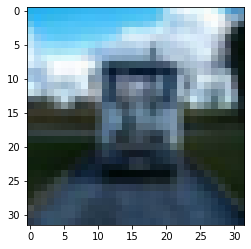

In [19]:
show_exemple(*dataset[-1])

Label:  airplane (0)


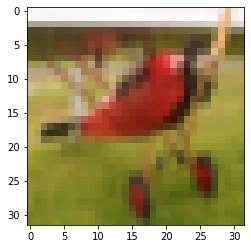

In [21]:
show_exemple(*dataset[2])

Label:  airplane (0)


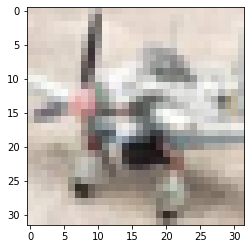

In [31]:
show_exemple(*dataset[101])

In [33]:
project_name="cnn-in-pytorch"
jovian.commit(project=project_name)


[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/boubekri/cnn-in-pytorch


'https://jovian.ai/boubekri/cnn-in-pytorch'

# Training and Validation Datasets
While building real world machine learning models, it is quite common to split the dataset into 3 parts:

- **Training set** - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
- **Validation set** - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
- **Test set** - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model. 
 
Since there's no predefined validation set, we can set aside a small portion (5000 images) of the training set to be used as the validation set. We'll use the `random_split` helper method from PyTorch to do this. To ensure that we always create the same validation set, we'll also set a seed for the random number generator.

In [34]:
random_seed = 42
torch.manual_seed(random_seed);

In [35]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [37]:
jovian.log_dataset(dataset_url=url, val_size=val_size, random_seed=random_seed)

[jovian] Dataset logged.


We can now create data loaders for training and validation, to load the data in batches

In [38]:
from torch.utils.data.dataloader import  DataLoader

batch_size = 128

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
